# DAY 0: Introduction to Numpy and Matplotlib


### Machine Learning and Computational Statistics (DSC6232)

#### Instructors: Weiwei Pan, Melanie Fernandez, Pavlos Protopapas

#### Due: July 20th, 2:00 pm Kigali Time

**First name**: Longin


**Last name**: DUSENGEUEZU

**ID**: 220020609


## Learning Goals:

1. become familiar with numerical operations with arrays using `numpy`
2. become familiar with plotting capabilites of `matplotlib`

In [ ]:
### Import basic libraries
import numpy as np
import pandas as pd
import sklearn as sk
import scipy as sp
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Simulation of Statistical Models

In this problem we want to model how much time it takes an USPS package processing system to process packages that arrive in a day. 

**Model of US Postal Services (USPS) Package Processing Time:**
1. packages arrive randomly in any given hour according to a Poisson distribution. That is, the number of packages $N$ is distributed as $Poi(\lambda)$, with $\lambda = 3$.
2. each package has a randomn size $S$ (measured in $in^3$) and weight $W$ (measured in pounds) jointly distributed as $\mathcal{N}\left([120, 4], \left[\begin{array}{cc} 1.5& 1\\ 1 & 1.5 \end{array} \right] \right)$.
3. processing time $T$ (in seconds) for each package is given by $T = 60 + 0.6 W + 0.2 S + \epsilon$, where $\epsilon$ is a random noise variable with Gaussian distribution $\epsilon \sim \mathcal{N}(0, 5)$.



Let's first get an intuitive understanding of the various distributions for number of packages, package weight and size etc. To do this, we visualize the distributions and ask ourselves if they realistically model the real-life quantities in which we are interested.

#### Number of Packages as a Random Variable

**Exercise 1:** Visualize the Poisson distribution that describes the number of packages that arrives in one hour. You can either plot the pmf of the Poisson distribution (available through `scipy.stats.poisson` ) as a function using `.plot()` or you can sample from the distribution using `numpy.random.poisson` then histogram the samples using `.hist()` to empirically approximate the pmf.

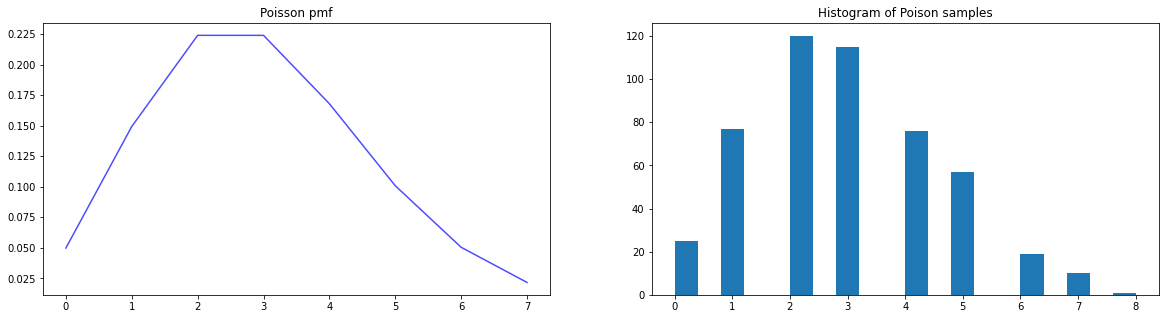

In [ ]:
#define the parmater for the poisson distribution for the number of packages N
mu = 3
#define a range of values of N to plot
x = np.arange(sp.stats.poisson.ppf(0.01, mu), sp.stats.poisson.ppf(0.99, mu))
#we use the poisson pmf function from scipy.stats
poisson_pmf = sp.stats.poisson(mu).pmf


#visualize the poisson pmf and the samples from a poisson distribution in a figure
# with 1 row and 2 columns of subplots and total size of 20, 5
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

#plot the poisson pmf as a line chart
ax[0].plot(x, poisson_pmf(x), color='blue', alpha=0.7)
#set the title of the plot
ax[0].set_title('Poisson pmf')

#now we plot samples from a poisson distribution as a histogram

# Step 1: sample 500 values from numpy's poisson distribution
# Hint: see the documentation for numpy.random.poisson at https://numpy.org/doc/1.18/reference/random/generated/numpy.random.poisson.html
samples = np.random.poisson(3,500)

# Step 2: plot the samples as a histogram
# Hint: see the documentation for matplotlib's .hist at https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html
ax[1].hist(samples,20,density=False )

#set the title of the plot
ax[1].set_title('Histogram of Poison samples')
#display the plot
plt.show()

**Exercise 2:** What is the most likely numbers of packages to arrive in an hour? What is a very unlikely number of packages to arrive in an hour?
**Answers:**
**A:**  most likely numbers of packages to arrive in an hour is around about 2 and 3

**B:** package that is unlikely to arrive in an hour is around 7



#### Size and Weight of the Packages as Random Variables

**Exercise 3:** Visualize the bivariate Guassian distribution for the size and weight, we can visualize the pdf as a bivariate function (using heatmaps and contour maps) or we can sample from the distribution and visualize a scatter plot (the scatter plot is an approximation of the pdf).

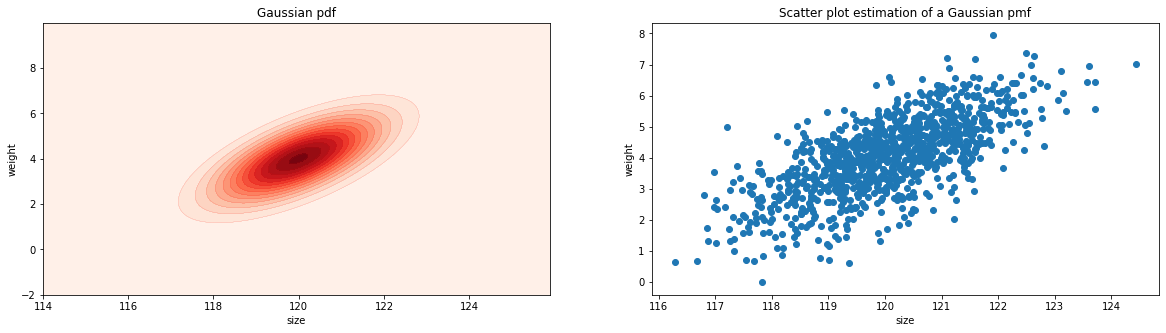

In [ ]:
#define the mean of the multivariate Gaussian
mu = [120, 4]
#define the covariance matrix of the multivariate Gaussian
#np.ones((n, m)) creates an nxm array of 1's
#np.eye(n) creates and nxn identity array
Sigma = np.ones((2, 2)) + 0.5 * np.eye(2)


#define a grid of points (in x and y coordinates) over which to visualize the Gaussian pdf
x, y = np.mgrid[114:126:.1, -2:10:.01]
#stack the x, y coordinates to make a list of points
points = np.dstack((x, y))
#get the value of the Gaussian pdf at those points
z = sp.stats.multivariate_normal(mu, Sigma).pdf(points)


fig, ax = plt.subplots(1, 2, figsize=(20, 5))
#plot the gaussian pdf as a heat-map
ax[0].contourf(x, y, z, levels=14, cmap='Reds')
#plot the gaussian pdf as a countour line map
ax[0].contour(x, y, z, levels=14, linewidths=0.1, colors='red')
#set the title of the plot
ax[0].set_title('Gaussian pdf')
#set the label of the x-axis
ax[0].set_xlabel('size')
#set the label of the y-axis
ax[0].set_ylabel('weight')


#now we plot samples from the gaussian pdf

# Step 1: sample 1000 points from numpy's multivariate normal distribution
# Hint: see the documentation for numpy's multivariate_normal at https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.random.multivariate_normal.html
samples = np.random.multivariate_normal(mu,Sigma,1000)


# Step 2: visualize the samples from the multivariate normal distribution as a scatter plot
# Hint: see the documentation for matplotlib's at https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
# Hint: you need to separate out the x and y coordinates of your samples to scatter plot them.
# For this, recall how to index into numpy arrays https://scipy-cookbook.readthedocs.io/items/Indexing.html
X_data=samples[:,0]
y_data=samples[:,1]
ax[1].scatter(X_data,y_data)

#set the title of the plot
ax[1].set_title('Scatter plot estimation of a Gaussian pmf')
#set the label of the x-axis
ax[1].set_xlabel('size')
#set the label of the y-axis
ax[1].set_ylabel('weight')
#display the plot
plt.show()

**Exercise 4:** 
What is the most likely size and weight of a package to arrive? This Gaussian distribution is skewed diagonally towards the right. What does this mean about the relationship between the two random variables: size and weight?

**Answers:**
**A:**  most likely size and weight is around about [118.5 - 120.5] and [2.4-4] respectvely, this means that there is positive relationship between size and weight, if size increases also weight increases and verse versa  

#### Processing Time as a Random Variable

**Exercise 5:** Let's plot the distribution of the processing time as a random variable. Since $T_{\text{total}}$ is a function of other random variables, we need to:
1. sample all random variables on which $T_{\text{total}}$ depends 
2. summing them appropriately to obtain samples of $T_{\text{total}}$



In [ ]:
def sample_total_time():
    '''
    function to simulate one sample of total processing time T_total
    '''
    #T=60+0.6W+0.2S+ϵ 
    #sample packages per hour for 24 hours
    mu = 3

    # Step 1: sample 24 hourly package arrivals from the poisson distribution
    samples = np.random.poisson(3,24)
   

    # Step 2: compute the total number of packages over 24 hours
    # Hint: use numpy's .sum() function
    total_packages = samples.sum()

    mu = [120, 4]
    Sigma = np.ones((2, 2)) + 1.5 * np.eye(2)
    # Step 3: for each package, sample a size and weight
    # Hint: you don't need to write a for loop, just use the 'size' parameter of numpy's multivariate_normal function 
    # size_weight_samples = ...

    # Step 4: for each package, sample an epsilon
    # Hint: see the documentation for numpy's multivariate_normal at https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
    # Hint: you don't need to write a for loop, just use the 'size' parameter of numpy's normal function
    # epsilons = ...
    
    # Step 5: compute total processing time for all packages
    # T_total = ...
    
    return T_total
 

In [ ]:
def sample_total_time():
    '''
    function to simulate one sample of total processing time T_total
    '''
    #sample packages per hour for 24 hours
    mu = 3

    # Step 1: sample 24 hourly package arrivals from the poisson distribution
  
    samples = np.random.poisson(3,24)
    #print(samples)

    # Step 2: compute the total number of packages over 24 hours
    # Hint: use numpy's .sum() function
    total_packages = np.sum (samples)
    #print(total_packages)

    mu = [120, 4]
    Sigma = np.ones((2, 2)) + 1.5 * np.eye(2)
    # Step 3: for each package, sample a size and weight
    # Hint: you don't need to write a for loop, just use the 'size' parameter of numpy's multivariate_normal function 
    size_weight_samples = np.random.multivariate_normal(mu,Sigma,size=total_packages)
    size = size_weight_samples[:,0]
    weight = size_weight_samples[:,1]
    #print(weight)
    #print(size_weight_samples)

    # Step 4: for each package, sample an epsilon
    # Hint: see the documentation for numpy's multivariate_normal at https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
    # Hint: you don't need to write a for loop, just use the 'size' parameter of numpy's normal function
    epsilons = np.random.normal(0,5,size=total_packages)
    #print(epsilons)
    
    # Step 5: compute total processing time for all packages
    T_total1 = 60 + 0.6 * weight + 0.2 * size + epsilons
    #print(T_total)
    T_total =np.sum(T_total1)
    #print(day_time)
    return T_total
sample_total_time()

7438.574156412675

After you complete the above function, run the following cell to generate the histogram for total processing time.

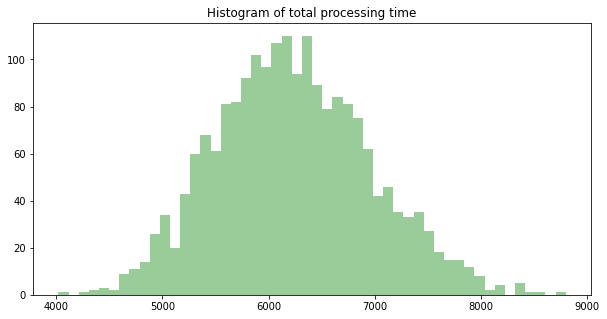

In [ ]:
#simulate 2000 days
number_of_samples = 2000
#create a list to store all the total processing times
total_times = []
#iterate for 2000 days
for n in range(number_of_samples):
    #compute the total processing time for packages that day and add to our list
    total_times.append(sample_total_time())

#visualize the total daily processing time samples over 2000 days as a histogram
#in a figure with 1 row and 1 column of subplots and figure size of 10x5
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#plot the total processing times as a histogram with 50 bins, green colored bars, and transparancy of 0.4
ax.hist(total_times, bins=50, color='green', alpha=0.4)
#set the title of the plot
ax.set_title('Histogram of total processing time')
#display the figure
plt.show()

**Exercise 6**: What is the most likely total daily processing time, according to your histogram? What is a total daily processing time that is extremely unlikely?

**Answers:**
**A:**  most likely likely total daily processing time is ranging between 5600 and 6500 , total daily processing time that is extremely unlikely is ranging between 4000 and 4600 also ranging between 8100 and 8900 
